In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Non-Parametric hypothesis test
The hypothesis testing for ordinal, norminal scales, and the categorical variables, the data samples may show skewed distribution (the skewness distribution makes the parametric tests less powerful because the mean is not the best measurement of central tendency.)

1) The underlying data do not meet the assumptions about the population sample

2) The population sample size is too small.

3) the analyzed data is ordinal and norminal

#### Type of tests

1) Mann-whitney U test

The testing version of the Independent samples t-test. The test primarily deals with two independent samples that containt ordinal data (e.g., customer satisfactions, product rating,...)

2) Wilcoxon Signed Rank test

This is a counterpart of the paired sample t-test. The test compares two dependent samples with ordinal data

3) Kruskal-Wallis test

A non-parametric alternative to the one-way ANOVA, The Kruskall-Wallis test is used to compare more than two independent groups with ordinal data.

[(0, 0.0009765625), (1, 0.00976562500000001), (2, 0.04394531249999999), (3, 0.11718750000000014), (4, 0.20507812500000022), (5, 0.24609375000000025), (6, 0.20507812500000022), (7, 0.11718750000000014), (8, 0.04394531249999999), (9, 0.00976562500000001), (10, 0.0009765625), (11, 0.0)]


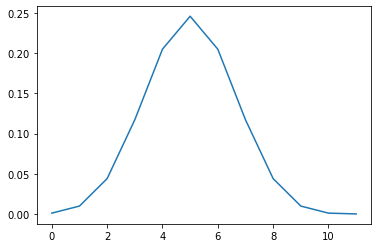

In [2]:
## PMF Binomial dist. values, used to find the critical value of signed test
x = np.arange(0,12)
k = 10
p = 0.5
val = [(i, stats.binom.pmf(i, k, p)) for i in x]
print(val)
plt.plot(x, stats.binom.pmf(x, k, p))

### One-sample signed test for median

H0: $m \geq m_0$

H1: $m < m_0$

In [4]:
X = [88, 70, 66, 55, 52, 50, 45, 43, 40, 39]
m0 = 60
signed = [np.sign(v - m0) for v in X]
pos_signed = 0
neg_signed = 0
for s in signed:
    if s > 0:
        pos_signed += 1
    elif s < 0:
        neg_signed += 1
minSigned = min(pos_signed, neg_signed)
p = 0
for i in range(minSigned + 1):
    v = val[i][1]
    p += v
alpha = 0.05
if p < alpha:
    print('reject H0')
else:
    print('accept H0')
print(f'min sign= {minSigned}, P= {p}')

accept H0
min sign= 3, P= 0.17187500000000014


### Wilcoxon Signed Rank sum test (paired two-sample)

We want to test if customer refer A over B

H0: $mA - mB \geq 0$

H1: $mA - mB < 0$ (lelf-tailed test)

In [8]:
# ## Wilcoxon signed-rank test (paired 2-sample test)
# seed the random number generator
# np.random.seed(1)
# generate random 2 data sets follow N(mu,sigma)
# data1 = 5 * np.random.randn(100) + 50
# data2 = 5 * np.random.randn(100) + 51
# ## 2 random data sets, non-normal dist.
data1 = [3, 4, 8, 6, 5, 8]
data2 = [6, 2, 6, 9, 4, 9]
# statistic Wilcoxon Signed-rank test 2 data sets,
stat, p = stats.wilcoxon(data1, data2)
print(f'statistic={stat} ,p_value={p}')
alpha = 0.05
if p < alpha:
    print('reject H0, different dist.')
else:
    print('accept H0, same dist.')

statistic=8.5 ,p_value=0.6875
accept H0, same dist.


### Wilcoxon Signed Rank sum test (one-sample) for median


In [9]:
# ## Wilcoxon signed-rank sum test for median, one sample
# ## using median test sign of observed_value - media
# ## H0: the population median value <= 67
# ## H1: the population median value > 67 (right-tailed test)
marks = [71, 79, 40, 70, 82, 72, 60, 76, 69, 75]
m0 = 67
neg_sum = 0
pos_sum = 0
signs = [v - m0 for v in marks]
rank = sorted(signs, key=lambda item: np.abs(item), reverse=False)
signed_rank = []
for i in range(len(rank)):
    if rank[i] > 0:
        signed_rank.append(i + 1)
        pos_sum += i + 1
    elif rank[i] < 0:
        signed_rank.append(-1 * (i + 1))
        neg_sum += -1 * (i + 1)
print(signed_rank)
# choose min(pos_sign, neg_sign)
min_sign = min(pos_sum, np.abs(neg_sum))
print(f'pos_sum= {pos_sum}, neg_sum= {neg_sum}')
print(f'min sign: {min_sign}')
# critical value at n= 10, alpha= 0.05, one tail test
cv = 11
if min_sign < cv:
    print('reject H0')
else:
    print('accept H0')

[1, 2, 3, 4, -5, 6, 7, 8, 9, -10]
pos_sum= 40, neg_sum= -15
min sign: 15
accept H0


### Wilcoxon Signed Rank sum test (paired two-sample)

In [12]:
# ## Wilcoxon signed-rank sum test for median, one sample
# ## using median test sign of observed_value - media
# ## H0: the population two median values = 0
# ## H1: the population two median values != 0 (two-tailed test)
rate1 = [3, 9, 2, 6, 8, 5]
rate2 = [9, 7, 5, 10, 6, 8]

neg_sum = 0
pos_sum = 0
signs = [v2 - v1 for v1, v2 in zip(rate1, rate2)]
rank = sorted(signs, key=lambda item: np.abs(item), reverse=False)
signed_rank = []
for i in range(len(rank)):
    if rank[i] > 0:
        signed_rank.append(i + 1)
        pos_sum += i + 1
    elif rank[i] < 0:
        signed_rank.append(-1 * (i + 1))
        neg_sum += -1 * (i + 1)
print(signed_rank)
# choose min(pos_sign, neg_sign)
min_sign = min(pos_sum, np.abs(neg_sum))
print(f'pos_sum= {pos_sum}, neg_sum= {neg_sum}')
print(f'min sign: {min_sign}')
# critical value at n= 6, alpha= 0.1, one tail test
cv = 2
if min_sign > cv:
    print('reject H0')
else:
    print('accept H0')

[-1, -2, 3, 4, 5, 6]
pos_sum= 18, neg_sum= -3
min sign: 3
reject H0


### Mann-Whitney Signed Rank sum test (unpaired two-sample)

In [13]:
# ## Mann-Whitney U test (2-sample), rank-sum test
# ## H0: no difference in ranking, both groups are equal
# ## H1: both group's ranks are different
rate1 = [3, 4, 2, 6, 2, 5]
rate2 = [9, 7, 5, 10, 6, 8]
stat, p = stats.mannwhitneyu(rate1, rate2)
print(f'statistic U= {stat}, p_value= {p}')
ranked = stats.rankdata(rate1+rate2)
print(ranked)
R1 = 0
R2 = 0
for i in range(len(ranked)):
    if i < len(rate1):
        R1 += ranked[i]
    else:
        R2 += ranked[i]
print(f'R1= {R1}, R2= {R2}')
n1 = len(rate1)
n2 = len(rate2)
U1 = R1 - (n1*(n1 + 1)/2)
U2 = R2 - (n2*(n2 + 1)/2)
print(f'U1= {U1}, U2= {U2}')
tx = max(R1, R2)
# calc statistic value, nx= numbers of group given max(R1, R2)
nx = 0
if R1 - R2 > 0:
    nx = n1
else:
    nx = n2
U = (n1 * n2) + (nx * (nx + 1)/2) - tx
print(f'statistic U= {U}')
# alpha= 0.05, n1= 6, n2=6, lookup table for cv
cv = 5
if U < cv:
    print('reject H0')
else:
    print('accept H0')
U1_effect = U1/(n1*n2)
U2_effect = U2/(n1*n2)
print(f'Effect size: u1= {U1_effect}, u2= {U2_effect}')

statistic U= 2.0, p_value= 0.006295955745189842
[ 3.   4.   1.5  7.5  1.5  5.5 11.   9.   5.5 12.   7.5 10. ]
R1= 23.0, R2= 55.0
U1= 2.0, U2= 34.0
statistic U= 2.0
reject H0
Effect size: u1= 0.05555555555555555, u2= 0.9444444444444444


### Concordant, Discordant pairs, Kendall Tau-b

In [18]:
# ## concordant and discordant pairs
# g1 = [1, 2, 3, 4, 5]
# g2 = [1.5, 1.5, 5, 3, 4]
g1 = [5, 8, 4, 8, 8, 4, 6, 9, 10, 8]
g2 = [10, 9, 7, 9, 9, 6, 10, 8, 2, 8]
pairs = list(zip(g1, g2))
con = 0
dis = 0
tied1 = 0
tied2 = 0
for i, v in enumerate(pairs):
    i += 1
    while i < len(pairs):
        e1 = pairs[i][0]
        e2 = pairs[i][1]
        sign1 = np.sign(e1 - v[0])
        sign2 = np.sign(e2 - v[1])
        if sign1 == 0:
            tied1 += 1
        if sign2 == 0:
            tied2 += 1
        if sign1 > 0:
            if sign2 > 0:
                con += 1
            elif sign2 < 0:
                dis += 1
        elif sign1 < 0:
            if sign2 < 0:
                con += 1
            elif sign2 > 0:
                dis += 1
        i += 1
print(f'concordant= {con} ,discordant= {dis}')
n = len(pairs)
tau_a = (con - dis) / (n * (n -1)/2)
print(f'tau_a= {tau_a}')
# ## tau_b
print(f'__tied group1= {tied1}, tied group2= {tied2}')
n1 = len(g1) * (len(g1) - 1)/2 - tied1
n2 = len(g2) * (len(g2) - 1)/2 - tied2
tau_b = (con - dis) / np.sqrt(n1 * n2)
print(f'tau_b= {tau_b}')
tb, p_val = stats.kendalltau(g1, g2)
print(tb, p_val)

concordant= 14 ,discordant= 22
tau_a= -0.17777777777777778
__tied group1= 7, tied group2= 5
tau_b= -0.20519567041703082
-0.20519567041703082 0.44656317623750674


### Chi-square test for one-sample 

In [15]:
# ## chi-square for one category test
# ## calc X_sq value, compares to X_cv (df, alpha), if X_sq > X_cv reject H0
# ## H0: the color frequency occurs equal
# ## H1: frequency does not equal
cat = [8, 4, 2, 6]
mu = np.mean(cat)
df = len(cat) - 1
X_sq = sum([(v - mu)**2/mu for v in cat])
print(f'X_square= {X_sq}, df= {df}')
# alpha = 0.05, df= 3 lookup for probability of chi_cv on chi dist. table
X_cv = 7.815
if X_sq > X_cv:
    print('reject H0')
else:
    print('accept H0')

X_square= 4.0, df= 3
accept H0


### Chi-square test for 2 categorical variables (independent samples)

In [16]:
# ## chi-square test for 2 categorical variables (independent)
# ## H0: two category frequencies are similar
# ## H1: they are not similar, if X_sq != 0
cal1 = [40, 10]
cal2 = [15, 10]
ext_sum = [ v1 + v2 for v1, v2 in zip(cal1, cal2)]
print(ext_sum)
total = sum(ext_sum)
pairs = []     # store tube (observed, expected) of cal1
for i in range(len(cal1)):
    pairs.append((cal1[i], sum(cal1) * ext_sum[i] / total))
for i in range(len(cal2)):
    pairs.append((cal2[i], sum(cal2) * ext_sum[i] / total))
# more for loop if there has additional cal
print(pairs)
X_sq = sum([(v1 - v2)**2/v2 for v1, v2 in pairs])
print(f'Chi-square X2= {X_sq}')

[55, 20]
[(40, 36.666666666666664), (10, 13.333333333333334), (15, 18.333333333333332), (10, 6.666666666666667)]
Chi-square X2= 3.409090909090909


### Cliff'd effect

In [20]:
## Cliff's d
g1 = [5, 8, 4, 8, 8, 4, 6, 9, 10, 8]
g2 = [10, 9, 7, 9, 9, 6, 10, 8, 2, 8]
greater = 0
lesser = 0
for i in g1:
    for j in g2:
        if i - j > 0:
            greater += 1
        elif i - j < 0:
            lesser += 1
cliff_d = (greater - lesser) / (len(g1) * len(g2))
print(f'Cliff d= {cliff_d}')
## probability of superiority (non-parametric)
pos_sign = 0
eq_sign = 0
for i in g1:
    for j in g2:
        if np.sign(i - j) > 0:
            pos_sign += 1
        elif np.sign(i - j) == 0:
            eq_sign += 1
ps = (pos_sign + 0.5 * eq_sign)/(len(g1) * len(g2))
print(f'probability of superiority ps= {ps*100}%')

Cliff d= -0.28
probability of superiority ps= 36.0%


### Pearson's effect and Cohen's d effect

In [22]:
# ## Pearson's correlation coefficient, Cohen d
x1 = [43, 21, 25, 42, 57, 59]
x2 = [99, 65, 79, 75, 87, 81]
n1 = len(x1)
n2 = len(x2)
x1_mean = np.mean(x1)
x2_mean = np.mean(x2)
x1_var = np.var(x1, ddof=1)
x2_var = np.var(x2, ddof=1)
s_pooled = np.sqrt(((n1-1)*x1_var + (n2-1)*x2_var)/(n1 + n2 - 2))

d = (x1_mean - x2_mean) / s_pooled
print(f'Cohen\'s correlation coefficient d= {d}')

x1_score = [v - x1_mean for v in x1]
x2_score = [v - x2_mean for v in x2]
x1x2_cov = sum([v1*v2 for v1, v2 in zip(x1_score, x2_score)]) / (n1 - 1)

pearson = x1x2_cov / np.sqrt(x1_var * x2_var)
print(f'Pearson correlation coefficient r= {pearson}')
sta, p_val = stats.pearsonr(x1, x2)
print(sta, p_val)

# print(np.sign(x1[1] - x1_mean))

Cohen's correlation coefficient d= -2.89222492212249
Pearson correlation coefficient r= 0.5298089018901744
0.5298089018901744 0.27964465700487173
